In [5]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('train.csv')
df.shape

(137, 43)

In [7]:
test_df = pd.read_csv('test.csv')
test_df.shape

(100000, 42)

In [8]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [9]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [10]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

display_all(df.head().transpose())

,0,1,2,3,4
Id,0,1,2,3,4
Open Date,07/17/1999,02/14/2008,03/09/2013,02/02/2012,05/09/2009
City,İstanbul,Ankara,Diyarbakır,Tokat,Gaziantep
City Group,Big Cities,Big Cities,Other,Other,Other
Type,IL,FC,IL,IL,IL
P1,4,4,2,6,3
P2,5.0,5.0,4.0,4.5,4.0
P3,4.0,4.0,2.0,6.0,3.0
P4,4.0,4.0,5.0,6.0,4.0
P5,2,1,2,4,2


In [11]:
df.isnull().sum().sort_index()/len(df)

City          0.0
City Group    0.0
Id            0.0
Open Date     0.0
P1            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
P16           0.0
P17           0.0
P18           0.0
P19           0.0
P2            0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
P28           0.0
P29           0.0
P3            0.0
P30           0.0
P31           0.0
P32           0.0
P33           0.0
P34           0.0
P35           0.0
P36           0.0
P37           0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
Type          0.0
revenue       0.0
dtype: float64

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-12-ae43a3902808>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


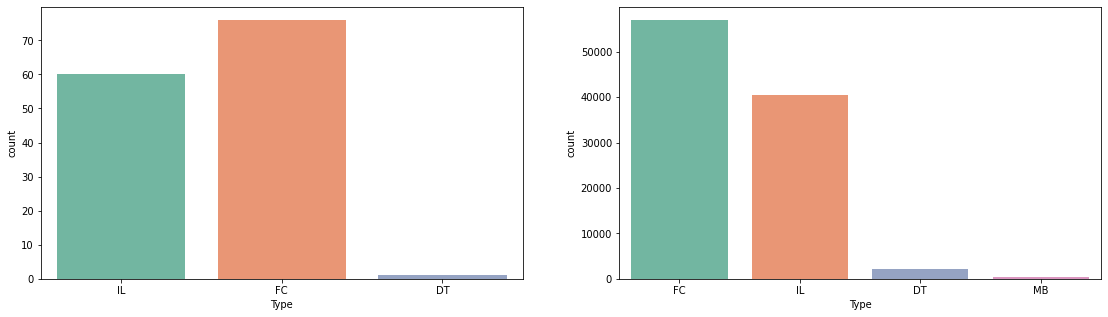

In [12]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df['Type'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test_df['Type'],palette="Set2", ax=ax[1]);
fig.show()

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-d2675e94e058>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


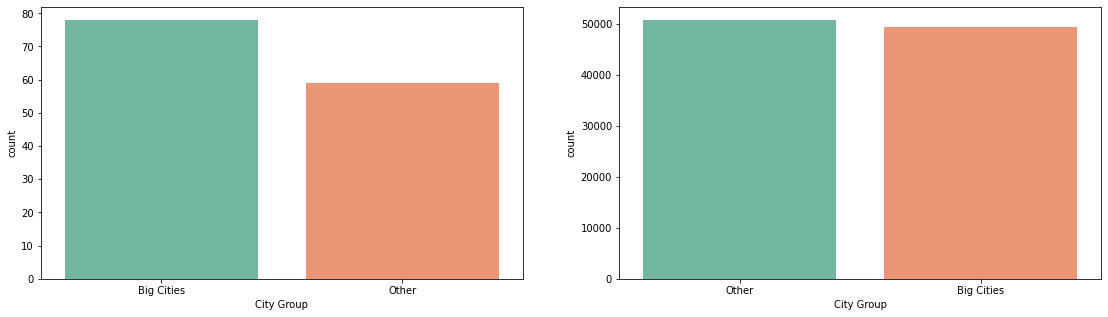

In [13]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df['City Group'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test_df['City Group'],palette="Set2", ax=ax[1]);
fig.show()

In [14]:
(df['City'].nunique(), test_df['City'].nunique())

(34, 57)

The **MB** Type will be replaced with the **DT** Type in the test set since it's not available in our training set. The **City** feature is useless since our training set contains **34** unique cities but the test set contains **57** unique cities.

In [15]:
test_df.loc[test_df['Type']=='MB', 'Type'] = 'DT'

In [16]:
df.drop('City', axis=1, inplace=True)
test_df.drop('City', axis=1, inplace=True)

In [17]:
import datetime
df.drop('Id',axis=1,inplace=True)
df['Open Date']  = pd.to_datetime(df['Open Date'])
test_df['Open Date']  = pd.to_datetime(test_df['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)
# scale days open
df['Days Open'] = (launch_date - df['Open Date']).dt.days / 1000
test_df['Days Open'] = (launch_date - test_df['Open Date']).dt.days / 1000
df.drop('Open Date', axis=1, inplace=True)
test_df.drop('Open Date', axis=1, inplace=True)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


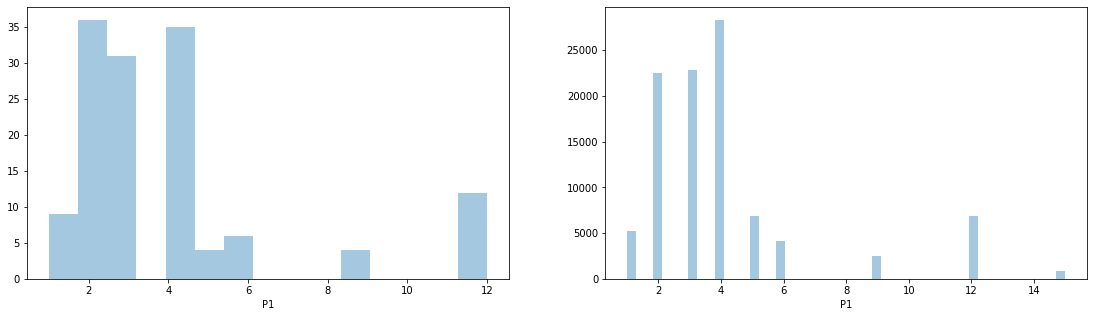

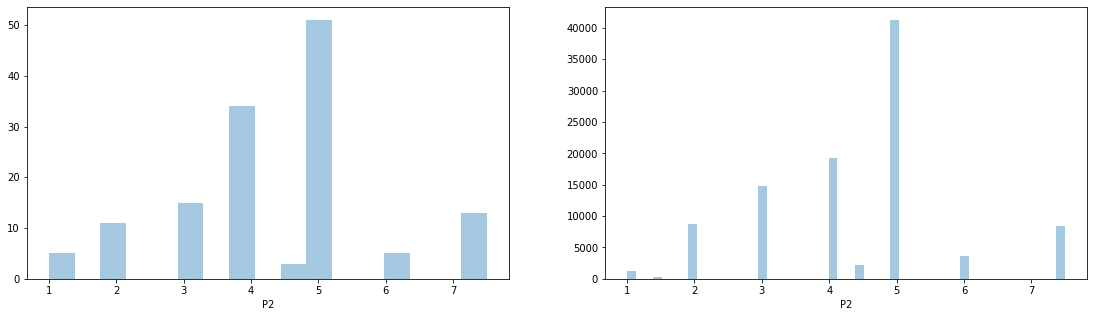

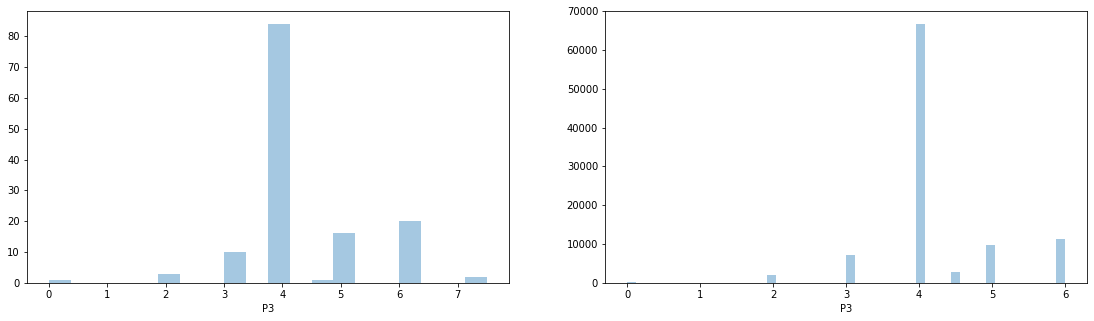

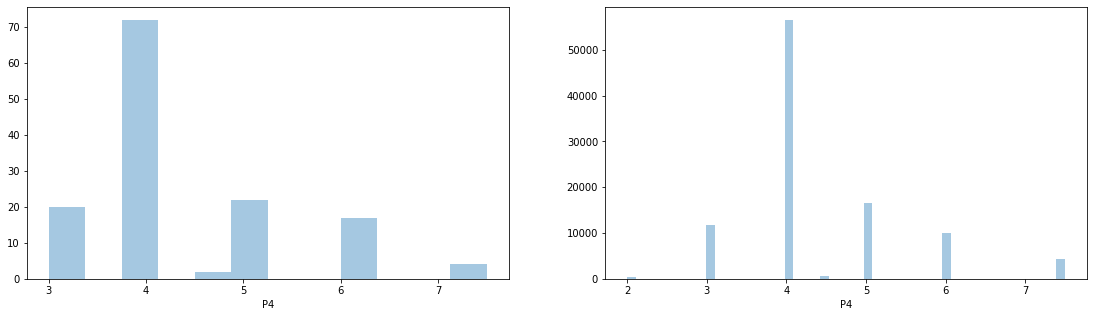

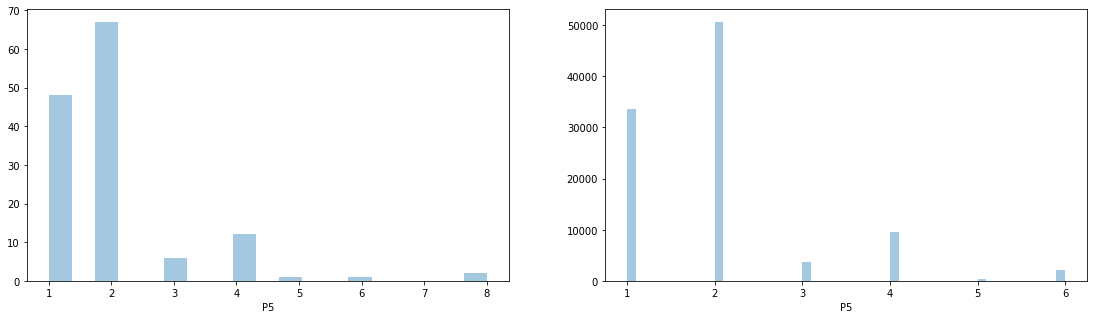

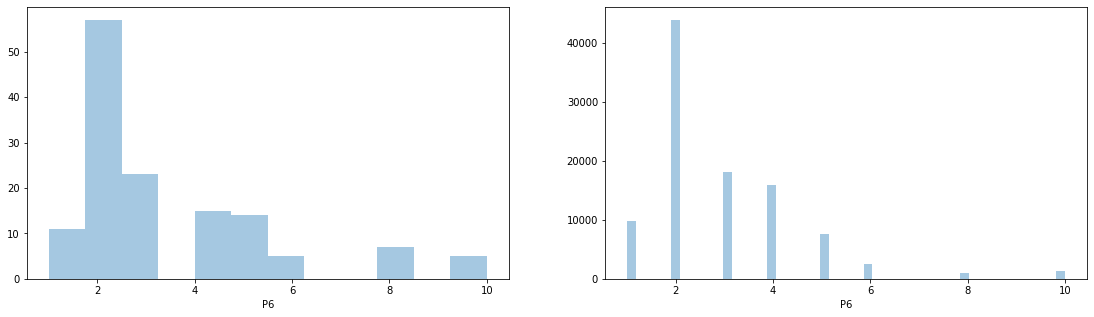

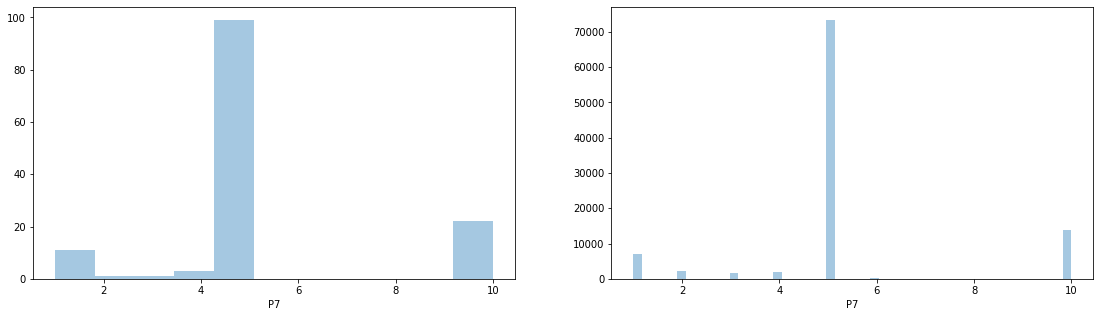

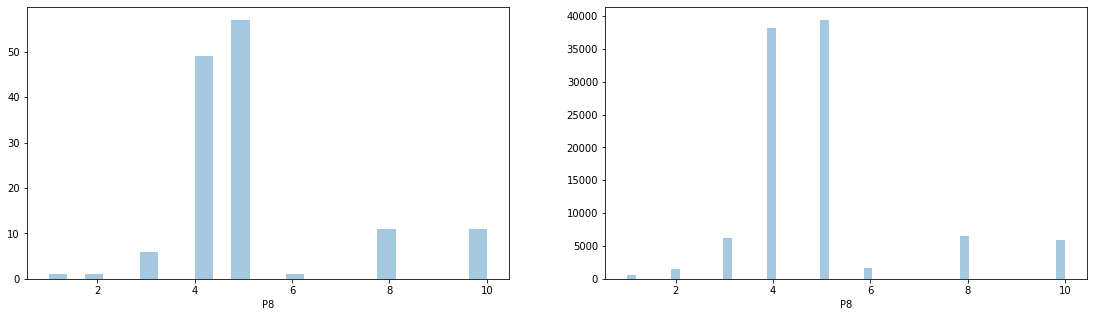

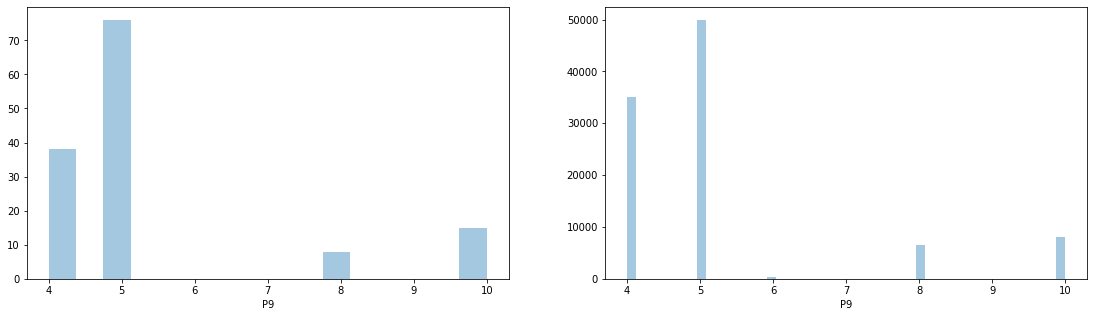

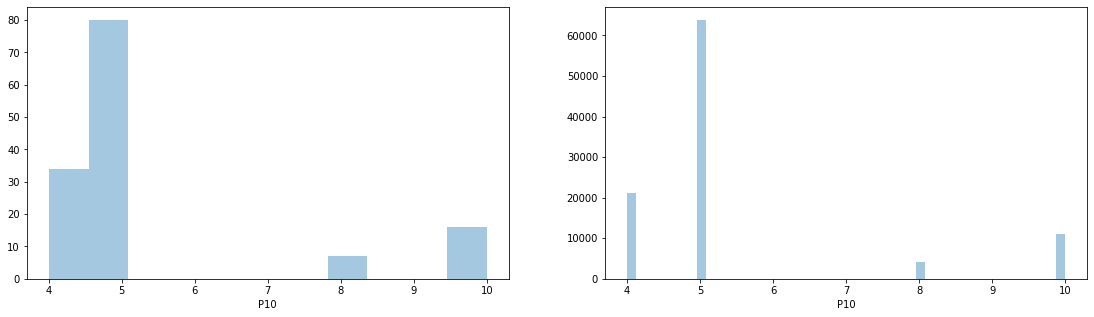

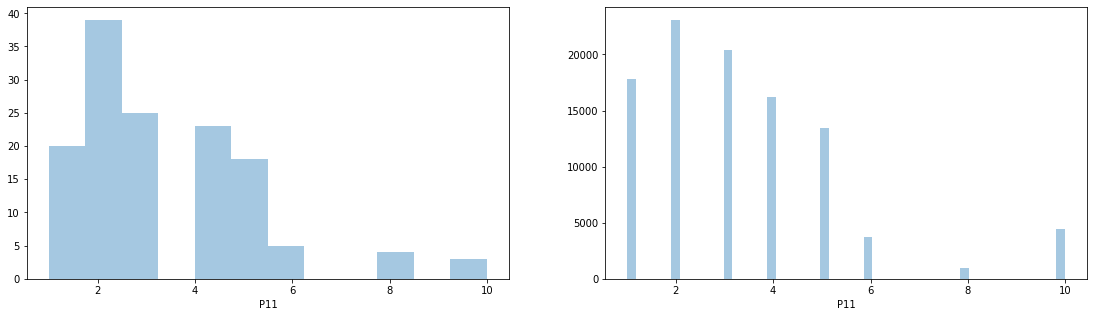

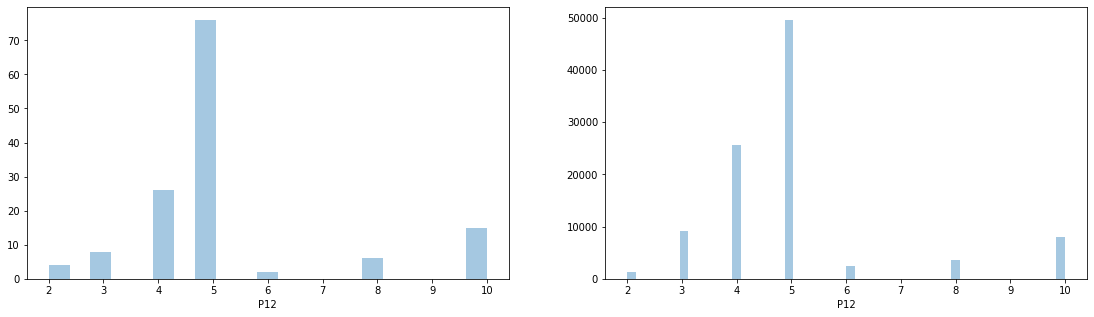

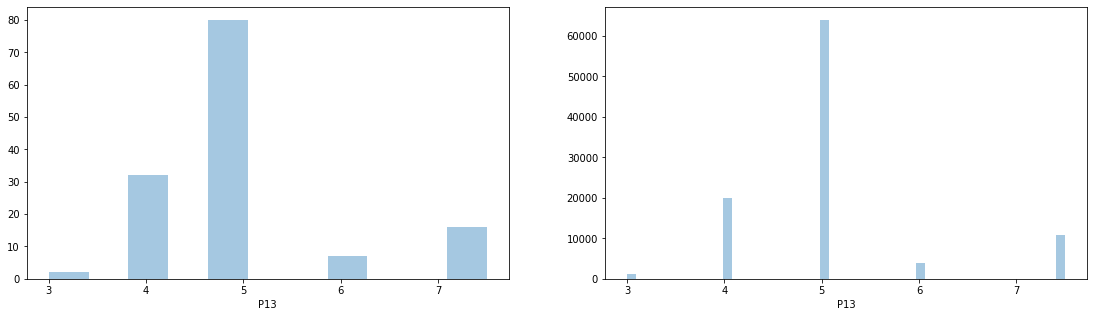

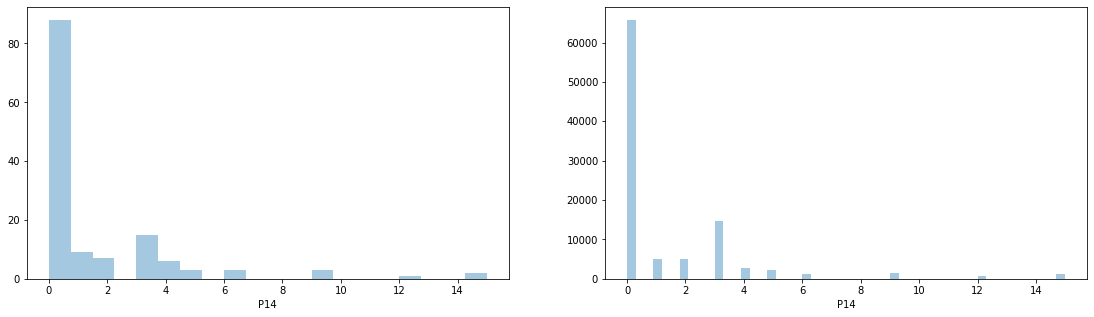

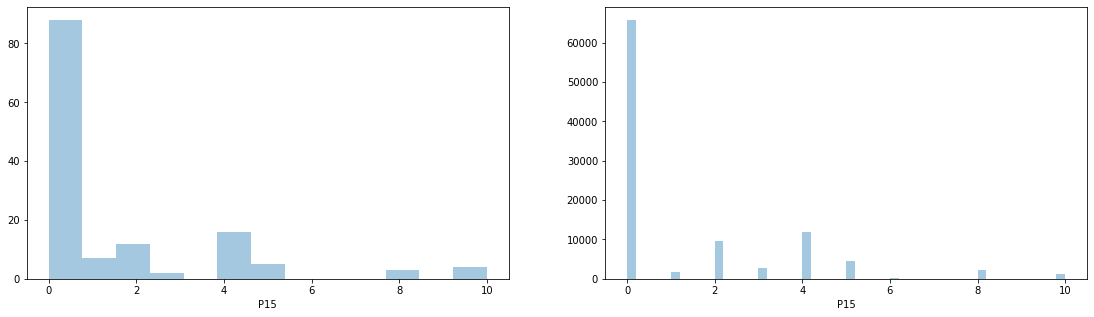

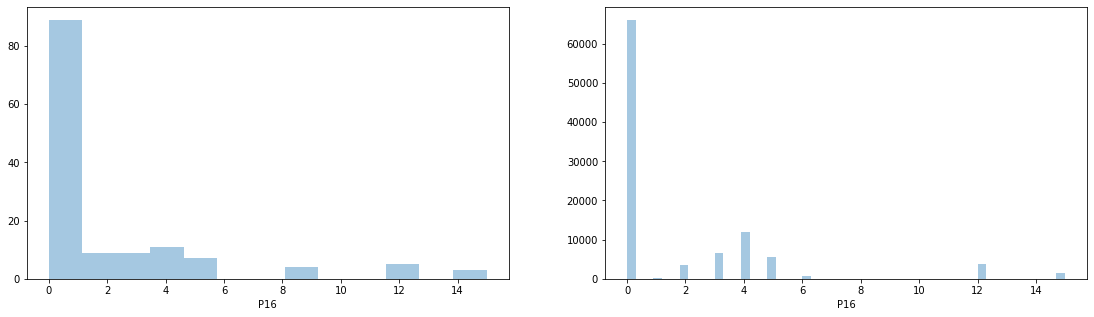

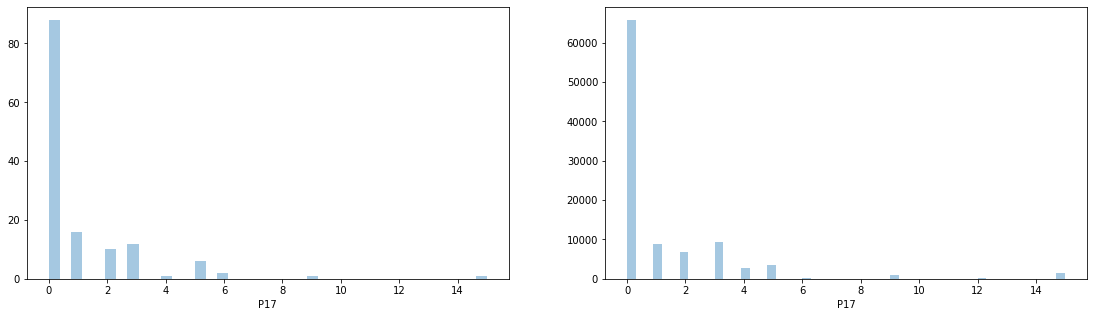

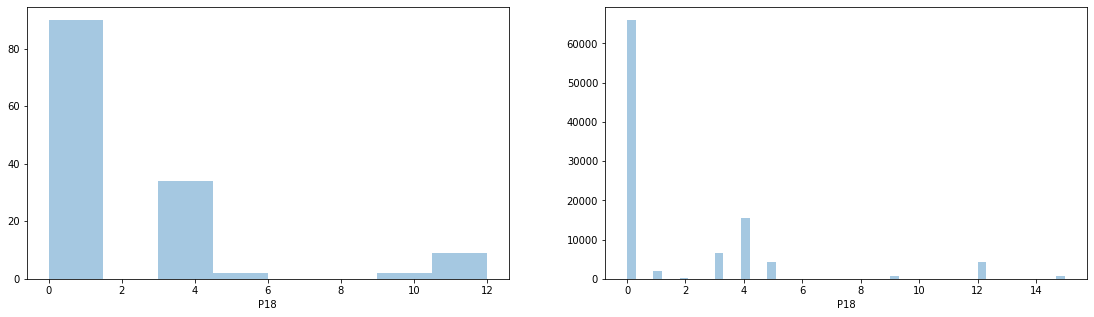

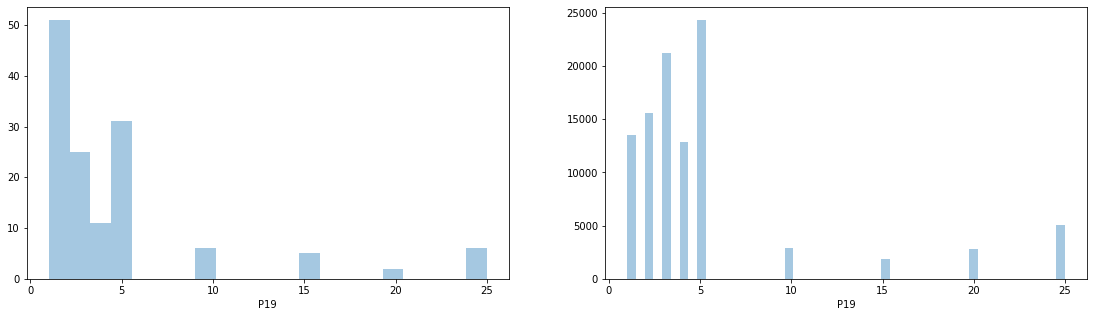

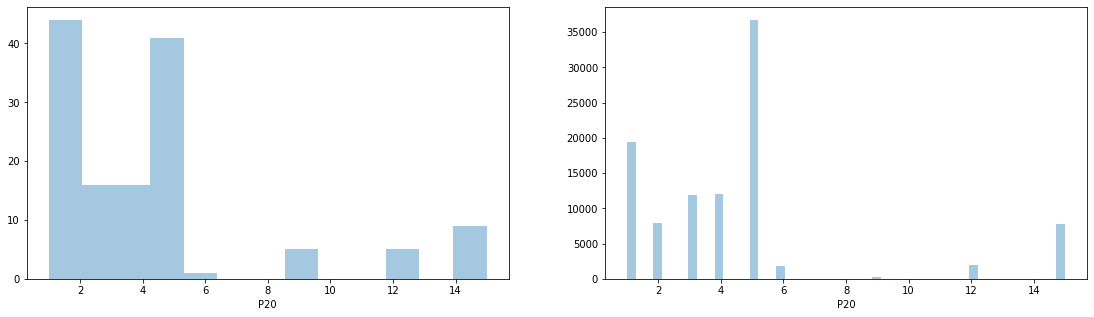

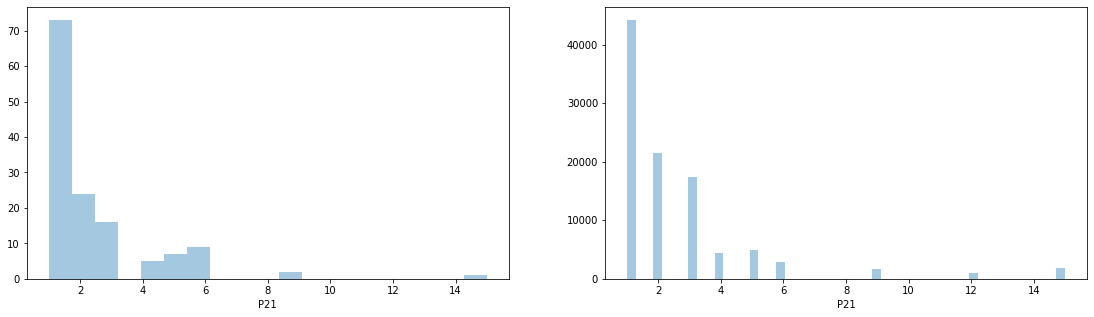

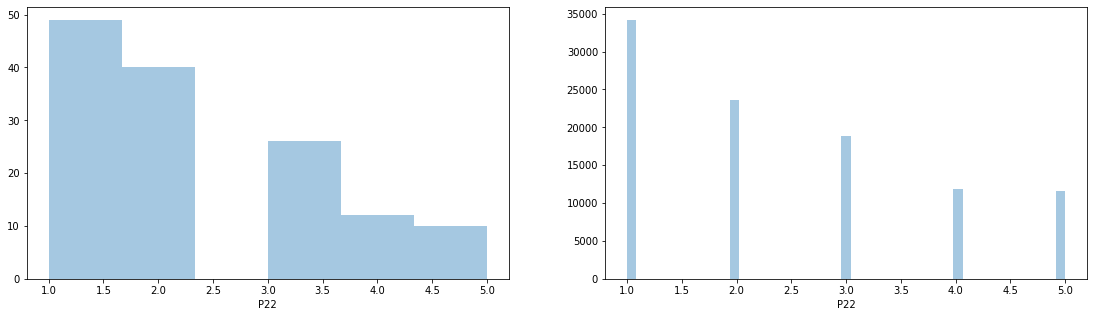

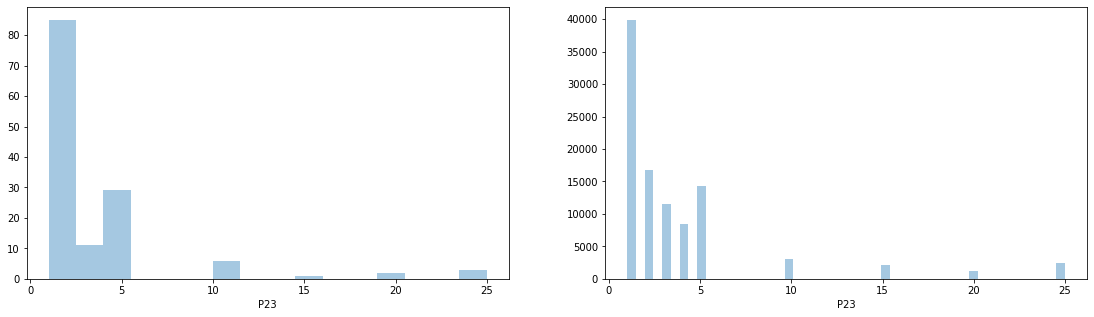

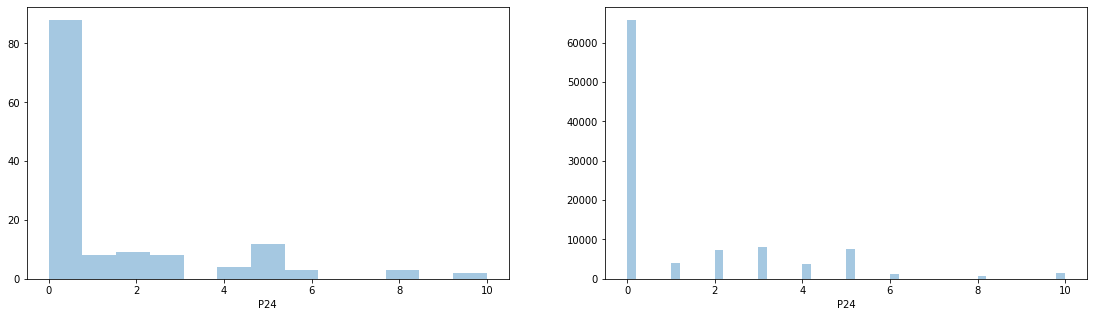

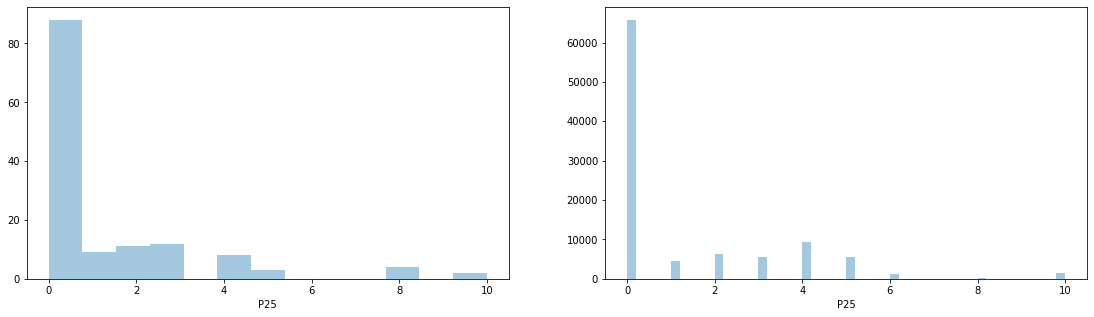

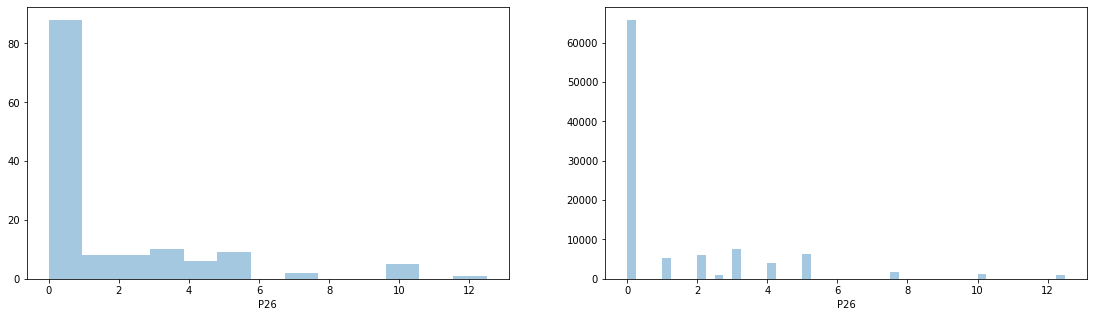

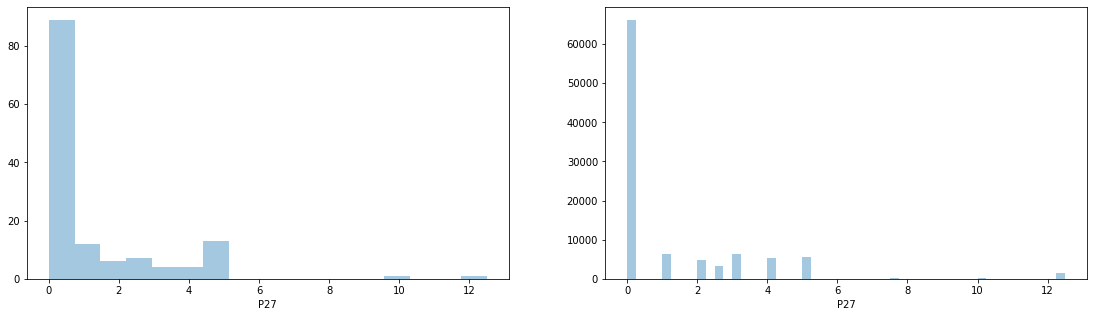

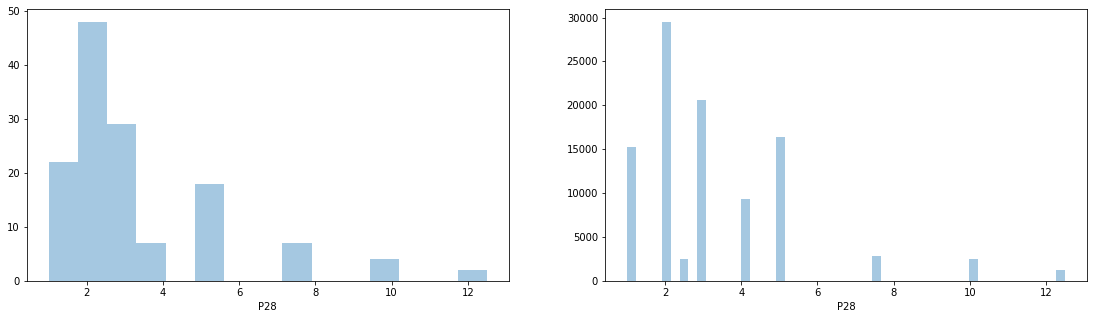

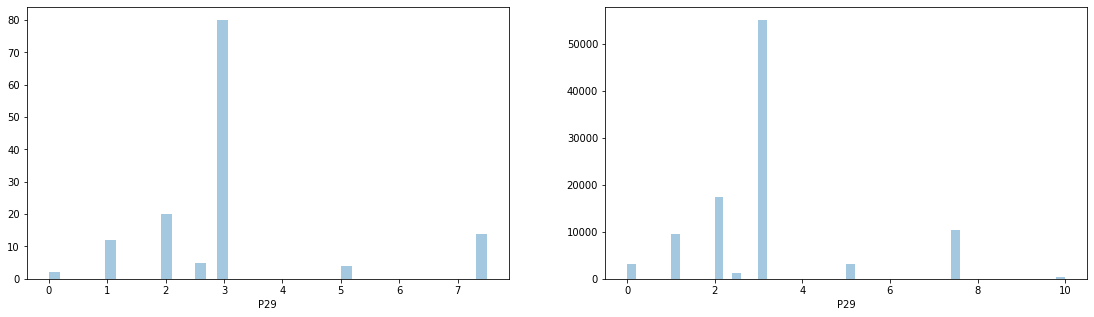

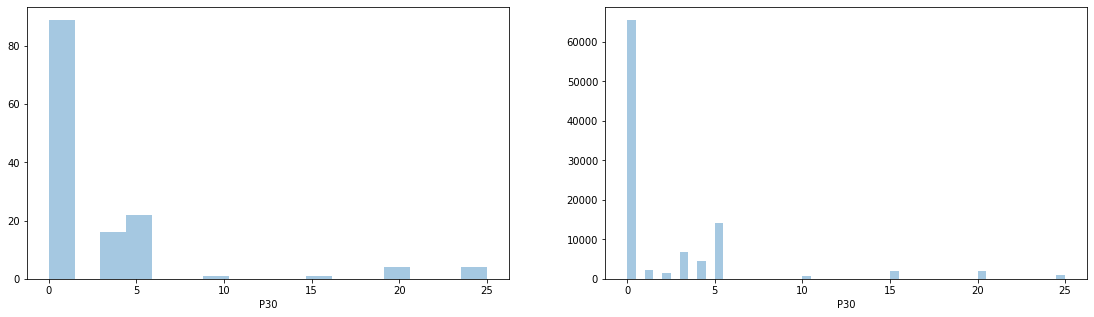

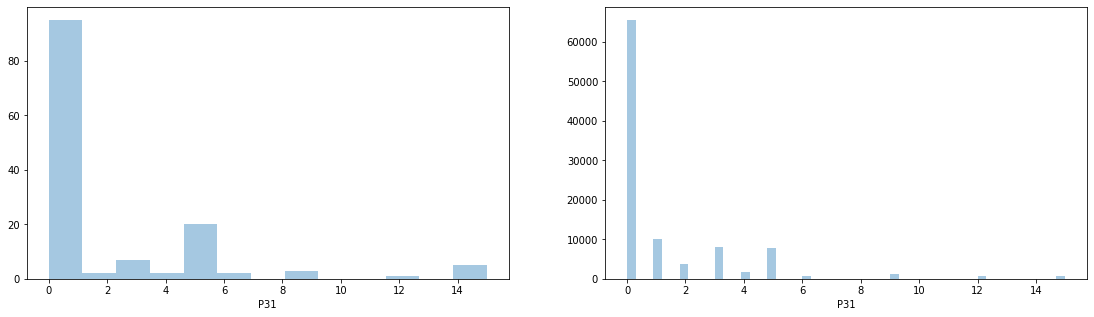

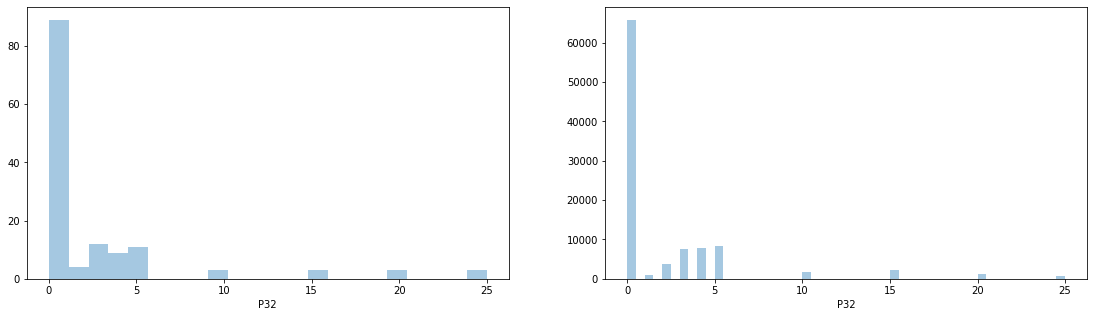

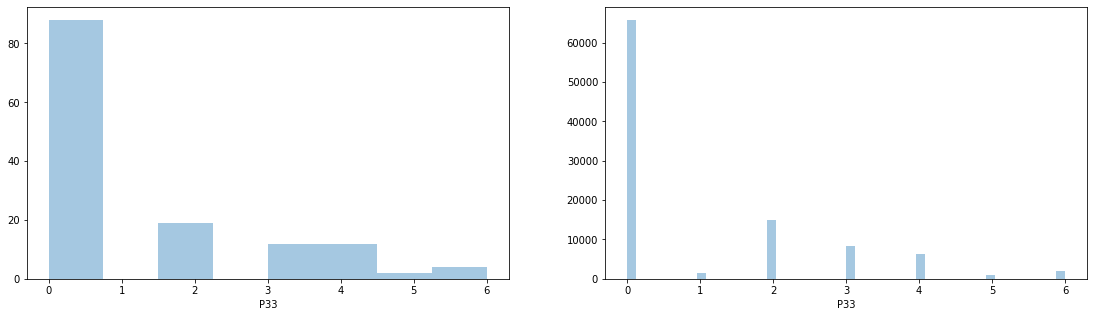

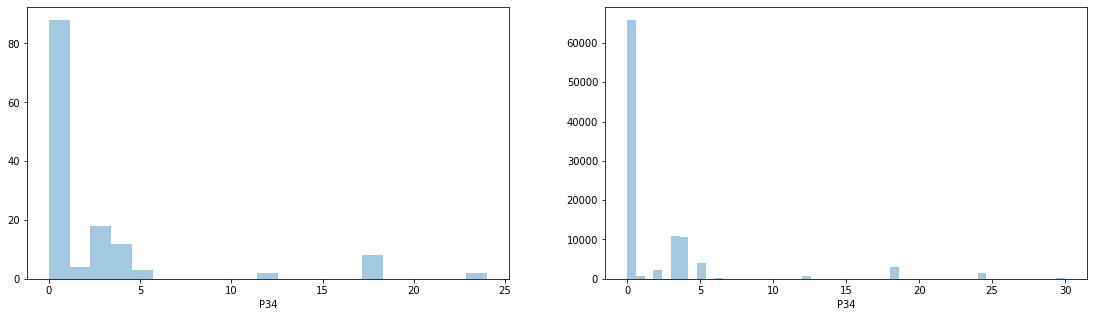

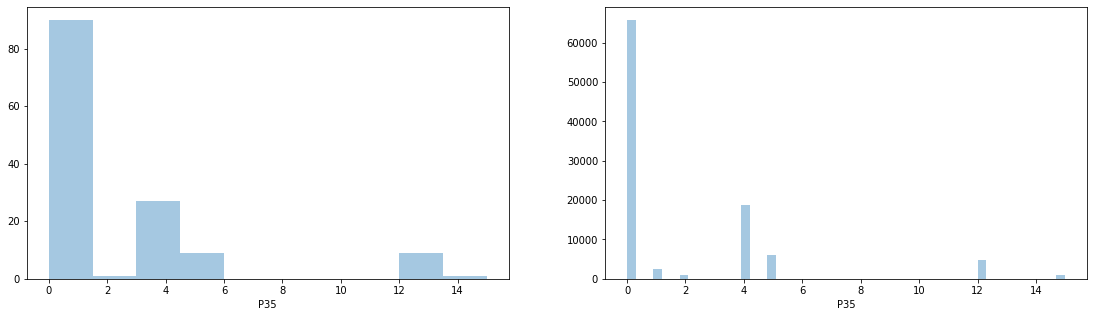

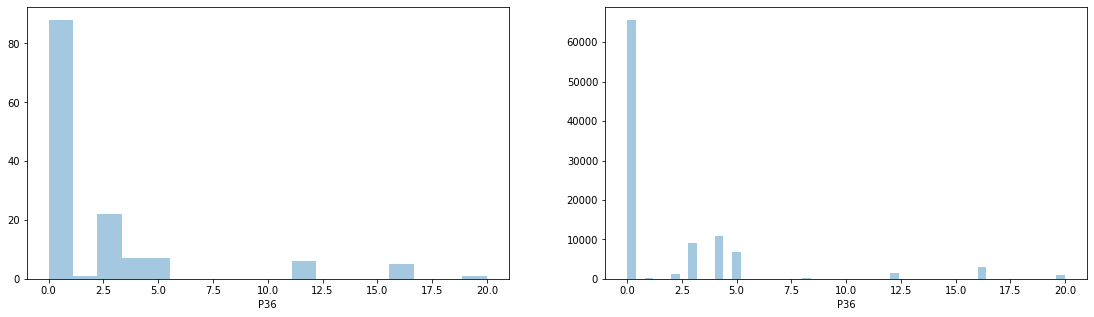

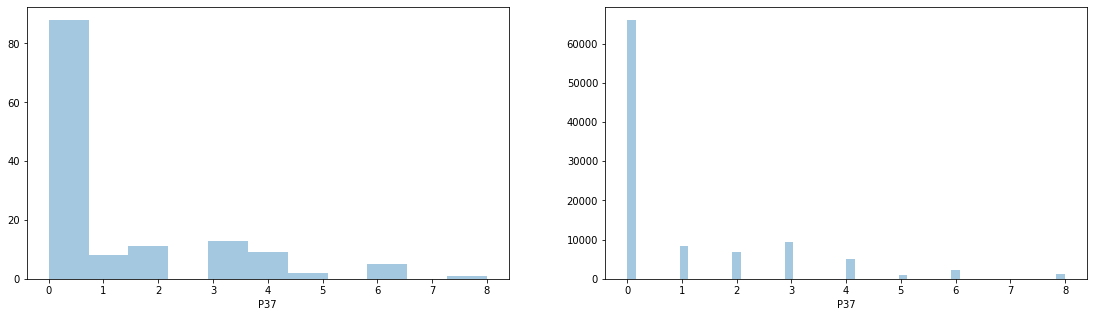

In [23]:
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df['P{}'.format(i)], ax=ax[0], kde=False);
    g2 = sns.distplot(test_df['P{}'.format(i)], ax=ax[1], kde=False);

In [24]:
df.dtypes

City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
Days Open     float64
dtype: object

<ipython-input-25-a43b6276e3b5>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


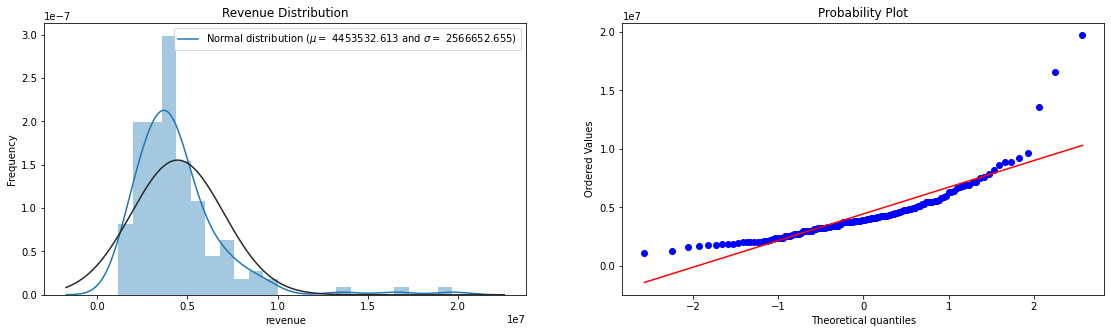

In [25]:
(mu, sigma) = norm.fit(df['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(df['revenue'], plot=plt)
f.show();

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-26-a05f8779acde>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show();


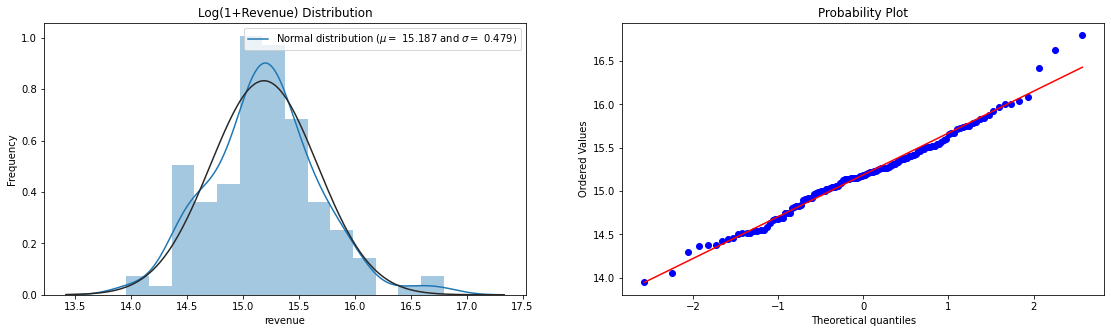

In [26]:
# Revenue is right skewed, taking the log will make it more normally distributed for the linear models
# Remember to use expm1 on predictions to transform back to dollar amount
(mu, sigma) = norm.fit(np.log1p(df['revenue']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(df['revenue']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(df['revenue']), plot=plt)
f.show();

In [27]:
# cap revenue at 10,000,000 for outliers
# df.loc[df['revenue'] > 10000000, 'revenue'] = 10000000

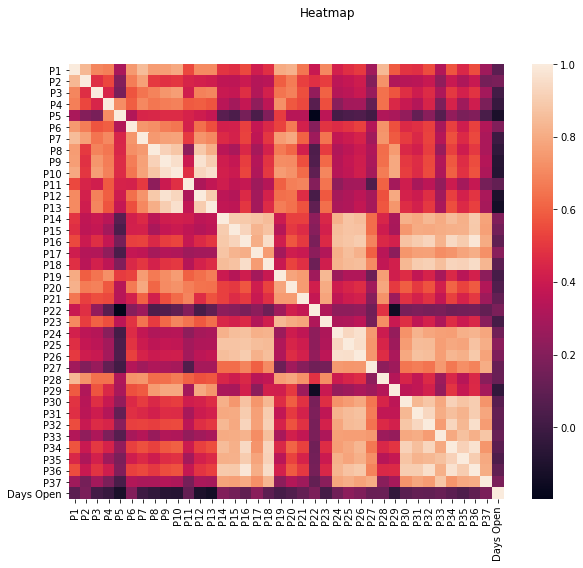

In [29]:
# Correlation between numeric features with revenue
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['revenue','City Group','Type'], axis=1).corr(), square=True)
plt.suptitle('Heatmap')
plt.show();

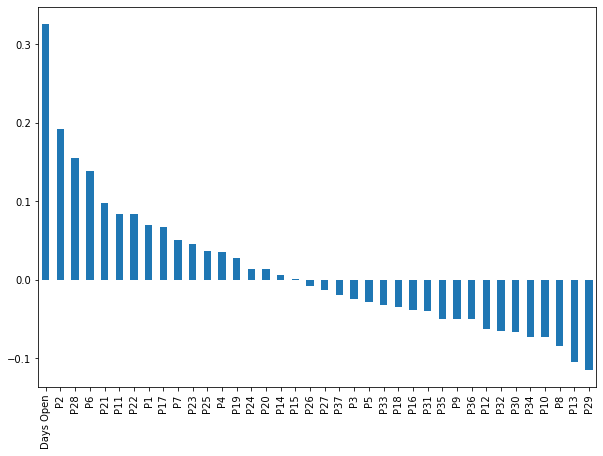

In [30]:
corr_with_revenue = df.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
corr_with_revenue.drop('revenue').plot.bar()
plt.show();

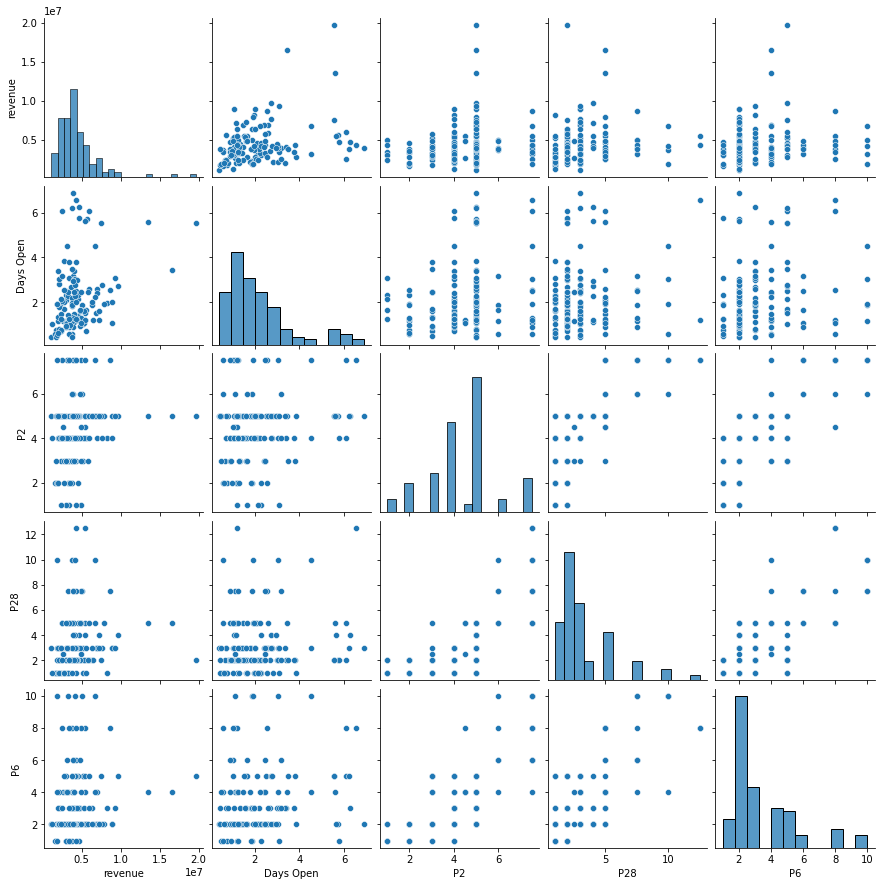

In [31]:
sns.pairplot(df[df.corr()['revenue'].sort_values(ascending=False).index[:5]])
plt.show();

In [ ]:
# Below uses multiple imputation for P1-P37, since they are actually categorical
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_train = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
imp_test = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=23)

p_data = ['P'+str(i) for i in range(1,38)]
df[p_data] = np.round(imp_train.fit_transform(df[p_data]))
test_df[p_data] = np.round(imp_test.fit_transform(test_df[p_data]))

In [ ]:
# drop_first=True for Dummy Encoding for object types, and drop_first=False for OHE
columnsToEncode = df.select_dtypes(include=[object]).columns
df = pd.get_dummies(df, columns=columnsToEncode, drop_first=False)
test_df = pd.get_dummies(test_df, columns=columnsToEncode, drop_first=False)

In [ ]:
df['revenue'] = np.log1p(df['revenue'])
X, y = df.drop('revenue', axis=1), df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)